In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
import pandas as pd
import scipy.io

import sklearn
from sklearn import decomposition, manifold, cluster, datasets
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, MDS
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml, fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, load_digits

from time import time

# 2. Dimensionality Reduction
----------------------
## a. Principal Component Analysis:
----------------------
### PCA(n_components = None, whitten = False, svd_solver = 'auto', tol = 0.0)
* linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* The input data is centered but not scaled for each feature before applying the SVD.
* #### Arguments: only "n_components" matters for now
 1.         n_components: number of components to keep. If not set: all components are kept.
            if 0 < n_components < 1 and svd_solver = 'full' : select the number of components :
            the amount of variance that needs to be explained is greater than the percentage specified by n_components.
  2.         whitten: when True - the components_ vectors are multiplied by the square root of n_samples and divided by singular values to ensure uncorrelated outputs with uni component-wise variances.
  3.       svd_solver: "auto", "full", "arpack", "randomized"
  4.         tol: tolerance for singular values computed by svd_solver = "arpack"
* #### Artributes: (of the PCA object)
 *         components_: Principal axes in feature space, representation the directions of maximm variance in the data.
 *         explained_variance_: The amount of variance explained by each of the selected components
 *         explained_variance_ratio_: percentage of variance explained by each of the selected components
 *         singular_values_: The singular values corresponding to each of the selected components.
 *         mean_: Per-feature empirical mean, estimated from the training set.
 *         n_components_: The estimated number of components
* #### Methods: (on the PCA object)
 *         fit(X): fit the model for dataset X
 *         fit_transform(X): fit the model for dataset X and apply the dimensionality reduction on X, return the reduced X'
 *         get_covariance(X): compute data covariance with the generative model
 *         transform(X): apply dimensionality reduction for dataset X
 *         inverse_transform(X): transform data back to its original space

In [2]:
# EXERCISES
# Ex 2.a.1: Iris dataset visualization with Principal Component Analysis

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Let's take a look at the first 5 data entries of the Iris dataset.
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


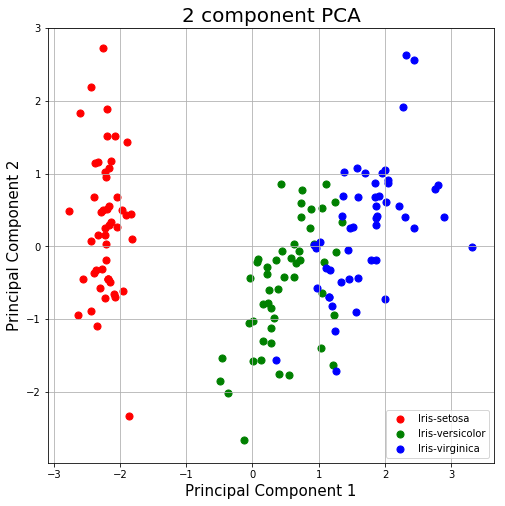

In [3]:
# Ex 2.a.1: Iris dataset visualization with Principal Component Analysis (cont)

# PCA Projection to 2D
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: variable "principalComponents" must be the reduced data.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
### END OF YOUR CODE

# Construct the Data Frame for the reduced data.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

# Concatenate the reduced Data Frame with the column "target"
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# Visualize the projection onto the 2 dimensions of the principalComponents
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [5]:
# Ex 2.a.2: Variance ratio by the principal components

# Data: 10 features
X1, Y1 = make_blobs(n_features=10, n_samples=100, centers=4, random_state=4, cluster_std=2)
# Verify the number of dimensions 
print(X1.shape)

# Principal Component Analysis into 4 components
### YOUR CODE HERE (Fill in the "None"). 2 lines of code.
# Hint: variable "PrincipalComponents" should be the dimension-reduced data
pca = PCA(n_components=4)
PrincipalComponents = pca.fit_transform(X1)
### END OF YOUR CODE

pc_df = pd.DataFrame(data = PrincipalComponents , columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

(100, 10)


,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


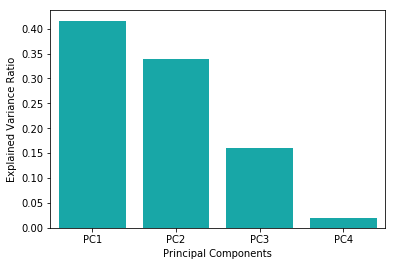

In [6]:
# Ex 2.a.2: Variance ratio by the principal components (cont)

# We want to see the relative contribution of the variances corresponding to the components
### YOUR CODE HERE (Fill in the "None")
# Hint: which attribute of the PCA object should we use?
variance_ratio = pca.explained_variance_ratio_
### END OF YOUR CODE

df = pd.DataFrame({'Explained Variance Ratio':variance_ratio,
             'Principal Components':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Components',y="Explained Variance Ratio", data=df, color="c");

### QUESTION: based on this plot, can we reduce further the number of components?
### ANSWER: the first 2 components almost dominate the others, we can further reduce to 2 components without losing much information.

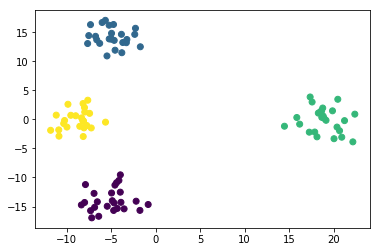

In [7]:
# Ex 2.a.2: Variance ratio by the principal components (cont)

principalca = PCA(n_components=2)
PrincipalComponents = principalca.fit_transform(X1) # 10-D to 2-D

# Compute K-means clustering
### YOUR CODE HERE
kmeans = KMeans(n_clusters=4)
# Hint: Variable "y_pred" should be cluster indices of samples
y_pred = kmeans.fit_predict(PrincipalComponents)
### END OF YOUR CODE

## Visualization
plt.scatter(PrincipalComponents[:, 0], PrincipalComponents[:, 1], c=y_pred)
plt.show()

In [8]:
# Ex 2.a.3 Image Compression

# Consider the MNIST dataset (hand-written digit)
mnist = fetch_openml('mnist_784', version = 1)

(70000, 784)


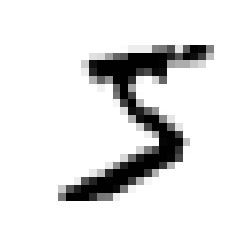

In [9]:
# Ex 2.a.3 Image Compression (cont)

# Extract the images and labels 
X, y = mnist["data"], mnist["target"]

# Size of the dataset 
print(X.shape)

# Show 1 sample image
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [10]:
# Ex 2.a.3 Image Compression (cont)

# So we can see that there are 70,000 samples (images) and each sample size of size 784 = 28 x28, equivalently 784 features
# Our goal is to apply dimensionality reduction to reduce the amount of space needed
# But at the same time, retain most of the variance explained

# We consider a subset of the MNIST dataset
X_train = X[:10000,:]

# PCA keeping 95% of the variance explained
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: variable "X_reduced" should be the dimensionality-reduced result of X_train
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
### END OF YOUR CODE

# Size of the dimension-reduced data
print(X_reduced.shape)

(10000, 150)


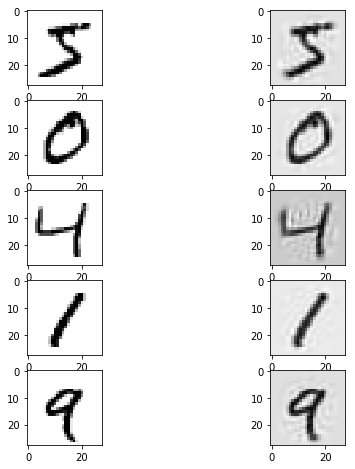

In [11]:
# Ex 2.a.3 Image Compression (cont)

# We can see that the number of features in each sample of X_reduced is only 150, much smaller than the original value 784
# while at the same time, X_reduced retains 95% of the variance explained by X_train

# Let's see with 95% explained variance preserved, how does PCA affect the resolution of the images

# Compare the original images vs. the dimensionality-reduced images
# Create the dimension-reduced dataset by PCA
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: variable "X_dim_reduced" should be the dimension-reduced dataset
pca = PCA(n_components=150)
X_dim_reduced = pca.fit_transform(X_train)
### END OF YOUR CODE

# X_dim_reduced is the projection of X_train onto a space of 169 dimensions
# In order to compare in terms of images, we need to reconstruct the 28x28 image data
# Reconstruct the image data:
### YOUR CODE HERE (Fill in the "None")
X_recovered = pca.inverse_transform(X_dim_reduced)
### END OF YOUR CODE

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 5
for i in range(1, columns*rows + 1):
    if i % 2 == 1:     # Show the original images on the left column
        original_digit = X_train[i//2]
        original_digit_image = original_digit.reshape(28,28)
        #original_digit_image = original_digit_image.reshape(12,12)
        fig.add_subplot(rows, columns, i)
        plt.imshow(original_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
    else:              # Show the recovered images on the right column
        reduced_digit = X_recovered[(i-1)//2]
        reduced_digit_image = reduced_digit.reshape(28,28)
        fig.add_subplot(rows, columns, i)
        plt.imshow(reduced_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")

plt.show()

### Optional exercise: further reduce the number of dimensions until the recovered images are no longer intact.

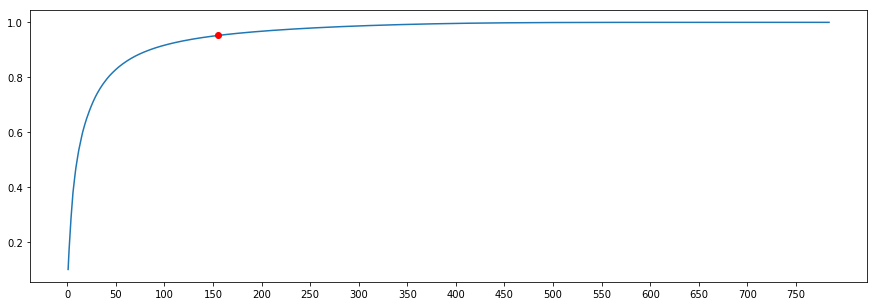

In [12]:
# Ex 2.a.3 Image Compression (cont)

# While the dimension-reduced-recoved images clearly have lower resolutions, the images are still mostly intact
# and we can still recognize the digits while the dimension is significantly reduced from 784 to 150

# EXTRA: Visualization of the Explained Variance as a function of the number of dimensions
pca = PCA().fit(X_train)

dimensions = range(1,785)
variance_ratio =np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (15,5))
plt.xticks(np.arange(0, 800, step=50))
plt.plot(dimensions, variance_ratio)
plt.plot(dimensions[154], variance_ratio[154], 'ro')
plt.show()

# 2. Dimensionality Reduction (cont)
------------------------
## b. Manifold Isomap Embedding :
------------------------
### Isomap(n_neighbors, n_components, eigen_solver, max_ter)
* Non-linear dimensionality reduction through Isometric Mapping
* #### Arguments: 
 1.         n_neighbors: number of neighbors to consider for each point
 2.         n_components: number of coordinates for the manifold
 3.        eigen_solver: choose the solver
  *                     "auto": choose the most efficient solver 
  *                      "arpack": Arnoldi decomposition to find the eigenvalues and eigenvectors
  *                      "dense": direct solver (i.e LAPACK) for the eigenvalue decomposition
 4.         max_iter: maximum number of iterations for the arpack solver. not used when eigen_solver = "dense"
* #### Artributes: (of the Isomap object)
 *         embedding_: store the embedding vectors, shape (n_samples, n_components)
 *        kernel_pca: the KernelPCA object used to implement the embedding 
 *   training_data: store the training data, (n_samples, n_features)
* #### Methods: (on the PCA object)
 *         fit(X): compute the embedding vectors for dataset X
 *         fit_transform(X): fit the model from data in dataset X and transform X
 *        transform(X): transform X
 *         get_params(): get parameters for this estimator
 *         reconstruction_error : compute the reconstruction error for the embedding

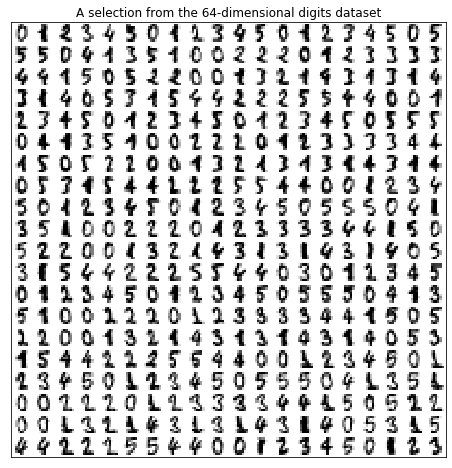

In [10]:
# EXERCISE
# Ex.2.b.1: Digit recognition using Isomap Embedding:

# Load the digit images
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.figure(figsize = (8,8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10,7))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

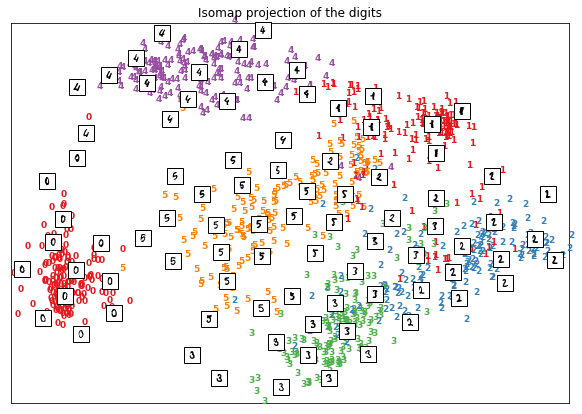

In [16]:
# Ex.2.b.1: Digit recognition using Isomap Embedding (cont)

# IsoMap Embedding into a 2D space, 30 neighbors to consider for each point
### YOUR CODE HERE (Fill in the "None")
# Hint: the "X_iso" must be the transformed data
iso_map = Isomap(n_neighbors=30, n_components=2)
X_iso = iso_map.fit_transform(X)
### END OF YOUR CODE

# Plot the Isomap embedding result
plot_embedding(X_iso, "Isomap projection of the digits")

In [4]:
# Ex.2.b.2: Isomap on Face images 

# Load the face images (it may take several images)
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

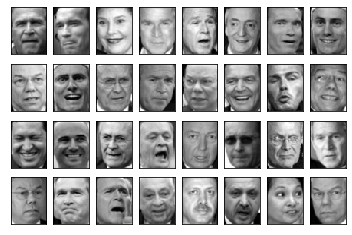

In [5]:
# Ex.2.b.2: Isomap on Face images (cont)

# Show some images
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

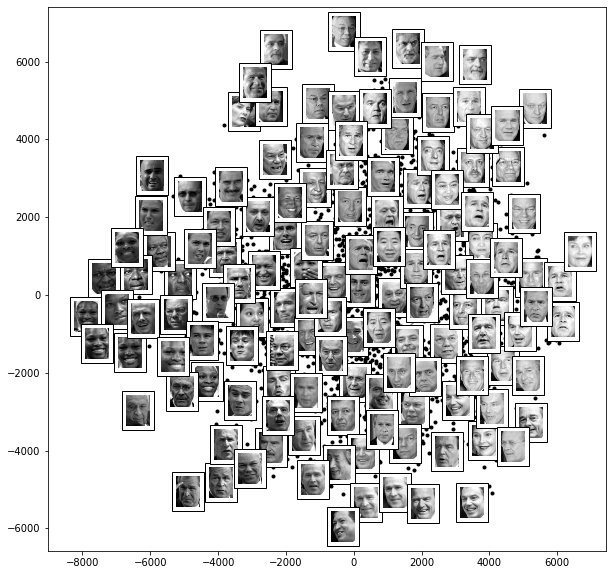

In [8]:
# Ex.2.b.2: Isomap on Face images (cont)

# Load the face images
X = faces.data

# Isomap for X 
### YOUR CODE HERE (Fill in the "None")
# Hint: the "proj" variable must be the transformed data
iso_map = Isomap(n_components=2)
proj = iso_map.fit_transform(X)
### END OF YOUR CODE

# Plot the embedded images
fig, ax = plt.subplots(figsize=(10, 10))
images = faces.images[:,::2,::2]
thumb_frac = 0.05
cmap = 'gray'
ax = ax or plt.gca()
    
ax.plot(proj[:, 0], proj[:, 1], '.k')
    
if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(X.shape[0]):
        dist = np.sum((proj[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist_2:
            # don't show points that are too close
            continue
        shown_images = np.vstack([shown_images, proj[i]])
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
        ax.add_artist(imagebox)
        
# QUESTION: What can you see from how the images are mapped in the plot?
# ANSWER: Left to right: lightness and darkness; bottom to top: general orientation of the faces.

# 2. Dimensionality Reduction (cont)
----------------------------
## c. Manifold Multidimensional scaling
----------------------------
### MDS(n_components, metric, max_iter)
* Non-linear dimensionality reduction through Isometric Mapping
* #### Arguments: 
 1.         n_components: number of coordinates for the manifold
 2.         metric: perform metric MDS with "True", nonmetric MDS otherwise.
 3.         max_iter: maximum number of iterations for a single run
* #### Artributes: (of the Isomap object)
 *         embedding_: store the position of the dataset in the embedding space
 *         stress_: final value of sum of squared distance of dispanrities and distances for all constrained points
* #### Methods: (on the PCA object)
 *         fit(X): compute the podiyion of the points in the embedding space
 *         fit_transform(X): fit the data for dataset X, and return the embedded coordinates
 *         get_params(): get parameters for this estimator

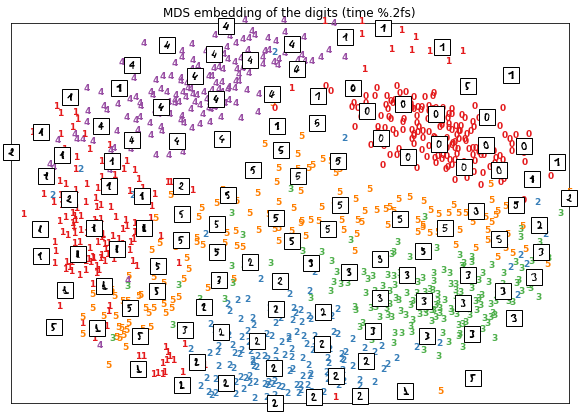

In [11]:
# EXERCISE:

# Ex 2.c.1: Digit recognition using MDS (Same Dataset with Exercise 2.b.1)
# Since we are re-using the function "plot_embedding()" function, please do not restart the notebook

# Load the digit images
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

# MDS for the dataset X, into a 2D space. (100 iterations)
### YOUR CODE HERE (fill in the "None")
# Hint: X_mds must be the MDS-transformed data
mds = MDS(n_components=2) 
X_mds = mds.fit_transform(X)
### END OF YOUR CODE

# Plot our embedding
plot_embedding(X_mds, "MDS embedding of the digits (time %.2fs)")

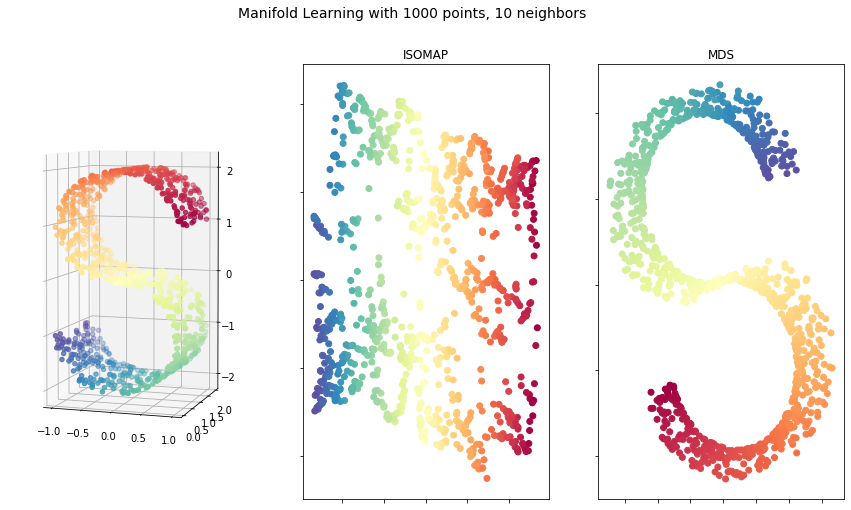

In [13]:
# Ex 2.c.2: IsoMap vs. MDS
# This Exercise illustrates the significant results of ISOMap and MDS when reducing from dimension 3 to 2

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10


fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

###### Comparison of ISOMAP and MDS when projecting onto a 2D space 
# Note: the attendees must deduce that 'n_components' = 2 (just in case)

##### ----- ISOMAP EMBEDDING -----
# Isomap Embedding
### YOUR CODE HERE (fill in the "None")
# Hint: the variable "X_isomap_transformed" must be the Isomap-transformed data
iso_map = Isomap(n_components=2) 
X_isomap_transformed = iso_map.fit_transform(X)
### END OF YOUR CODE
# Plot
ax = fig.add_subplot(132)
plt.scatter(X_isomap_transformed[:, 0], X_isomap_transformed[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("ISOMAP")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


##### ----- MDS EMBEDDING -----
# MDS Embedding (100 iterations)
### YOUR CODE HERE (fill in the "None")
# Hint: the variable "X_mds_transformed" must be the MDS-transformed data
mds = MDS(n_components=2)
X_mds_transformed = mds.fit_transform(X)
### END OF YOUR CODE
ax = fig.add_subplot(133)
plt.scatter(X_mds_transformed[:, 0], X_mds_transformed[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

## Reference
 1. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
 2. https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn
 3. https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
 4. http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/
 5. https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
 6. Hands-on Machine Learning with Scikit-learn, Keras and Tensorflow